# Time Series Forecasting
A common problem with a few solutions. I will go through them

Example domains include:
* Predicting how much inventory to stock
* How much website traffic you will have, and scaling instances accordingly
* operating temperature for power generators to prevent fault

The data being used is the Precipitation Data of Pune from 1965 to 2002 from [Kaggle](https://www.kaggle.com/datasets/abhishekmamidi/precipitation-data-of-pune-from-1965-to-2002?resource=download)

## Simple exploration

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

In [33]:
precip = pd.read_csv("data/pune.csv")
precip.set_index('Year', inplace=True)
precip = precip.transpose()
precip.describe()

Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,105.282833,74.965667,126.848667,90.519750,144.918500,106.125583,98.051000,59.206250,130.839417,118.823000,...,100.854333,165.640750,100.755667,135.944250,153.736667,133.603583,102.973583,91.171833,87.152083,85.406750
std,193.803249,136.712641,223.481438,121.542279,226.523917,130.810410,139.314988,100.112325,209.317999,148.032607,...,141.615296,272.170311,154.009795,193.999557,243.543158,189.382612,140.375007,128.438675,108.012656,152.205435
min,0.000000,0.000000,0.248000,0.318000,0.248000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
25%,3.954000,1.207250,7.142250,2.781250,2.380750,0.052750,0.000000,0.114500,2.285250,0.195000,...,1.849250,2.031000,1.501250,2.106000,3.819000,0.301000,0.205500,0.937250,1.182750,0.557500
50%,19.763000,22.673000,25.583500,23.316500,15.113500,42.127000,20.118000,12.541500,10.247000,34.036500,...,20.693500,25.100500,24.956500,9.260000,27.481000,34.341000,18.629500,20.755500,15.746500,19.958000
75%,77.661000,70.778000,181.741000,173.952250,252.480250,189.849000,163.160250,81.659500,201.637500,213.790250,...,169.184500,144.985500,126.533250,205.853750,154.772250,239.817750,191.715500,165.600500,165.869750,79.935750
max,606.071000,481.942000,780.006000,379.354000,678.354000,330.502000,372.693000,338.484000,696.024000,405.359000,...,450.088000,749.030000,501.461000,558.586000,673.831000,590.663000,415.471000,371.328000,279.547000,509.145000


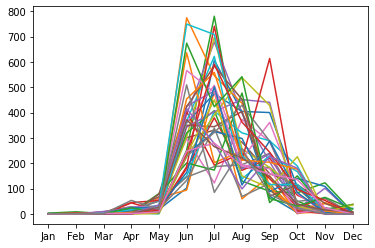

In [34]:
plt.plot(precip)
plt.show()

## Feed Forward Neural Network
A subset of ANN, where connections do not form cycles. 

In the case of time series forecasting, we define a 'look back' time interval. This interval defines how many (discrete) time steps the next value is dependent on. 

First, convert the matrix to a list

In [35]:
precip.transpose().describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.294368,1.101132,1.677184,12.381237,25.059789,337.096395,430.010395,277.088342,201.111711,73.245263,25.223474,6.069632
std,0.640510,1.741219,2.486516,13.671071,22.451708,171.666565,177.976444,132.245356,123.736320,62.936775,31.806180,11.725716
min,0.000000,0.000000,0.000000,0.061000,0.508000,94.088000,84.936000,59.386000,44.574000,1.078000,0.260000,0.000000
25%,0.000000,0.000000,0.000000,2.291750,7.005250,226.180250,322.461000,183.152750,105.936000,21.970500,3.732750,0.000000
50%,0.008000,0.247500,0.596000,5.489500,18.144500,312.100000,415.079500,243.230500,180.966500,49.830500,14.686000,0.496500
75%,0.248000,1.948500,2.076000,19.796500,33.066000,412.568250,555.284250,401.224500,242.433500,115.655750,37.006750,4.151500
max,3.013000,8.410000,9.619000,53.266000,80.539000,773.737000,780.006000,541.579000,613.522000,225.904000,122.809000,37.685000


In [36]:
ts = []

for row in precip.transpose().iterrows():
    print("Row: ", row)
    for item in row:
        ts.append(item)

Row:  (1965, Jan      0.029
Feb      0.069
Mar      0.000
Apr     21.667
May     17.859
Jun    102.111
Jul    606.071
Aug    402.521
Sep     69.511
Oct      5.249
Nov     16.232
Dec     22.075
Name: 1965, dtype: float64)
Row:  (1966, Jan      0.905
Feb      0.000
Mar      0.000
Apr      2.981
May     63.008
Jun     94.088
Jul    481.942
Aug     59.386
Sep    150.624
Oct      1.308
Nov     41.214
Dec      4.132
Name: 1966, dtype: float64)
Row:  (1967, Jan      0.248
Feb      3.390
Mar      1.320
Apr     13.482
May     11.116
Jun    251.314
Jul    780.006
Aug    181.069
Sep    183.757
Oct     50.404
Nov      8.393
Dec     37.685
Name: 1967, dtype: float64)
Row:  (1968, Jan      0.318
Feb      3.035
Mar      1.704
Apr     23.307
May      7.441
Jun    179.872
Jul    379.354
Aug    171.979
Sep    219.884
Oct     73.997
Nov     23.326
Dec      2.020
Name: 1968, dtype: float64)
Row:  (1969, Jan      0.248
Feb      2.524
Mar      0.334
Apr      4.569
May      6.213
Jun    393.682
Jul    678.35

In [46]:
matrix = precip.transpose().to_numpy()

In [51]:
matrix[0]

array([2.90000e-02, 6.90000e-02, 0.00000e+00, 2.16670e+01, 1.78590e+01,
       1.02111e+02, 6.06071e+02, 4.02521e+02, 6.95110e+01, 5.24900e+00,
       1.62320e+01, 2.20750e+01])

In [49]:
arr = matrix.reshape(-1)

In [71]:
def look_back(arr, t):
    out = []
    for i in range(t+1, len(arr)):
        out.append((arr[i - t:i], arr[i]))
    return out

t = 7

data = look_back(arr, t)

xs = [d[0].tolist() for d in data]
ys = [d[1] for d in data]

In [94]:
x_train, x_test, y_train, y_test = train_test_split(list(xs), list(ys), test_size=.3)
    
model = keras.models.Sequential([keras.layers.Dense(128, activation=tf.nn.relu, input_shape=[t]),
                            keras.layers.Dense(32, activation=tf.nn.relu),
                            keras.layers.Dense(1)])

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3 / 200))

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=100, verbose=2)
    

Epoch 1/1000
4/4 - 1s - loss: 41193.6133 - val_loss: 30584.3066 - 1s/epoch - 278ms/step
Epoch 2/1000
4/4 - 0s - loss: 36774.6094 - val_loss: 27624.4180 - 71ms/epoch - 18ms/step
Epoch 3/1000
4/4 - 0s - loss: 33679.9180 - val_loss: 25192.1582 - 73ms/epoch - 18ms/step
Epoch 4/1000
4/4 - 0s - loss: 31031.3867 - val_loss: 23240.5605 - 76ms/epoch - 19ms/step
Epoch 5/1000
4/4 - 0s - loss: 29091.1562 - val_loss: 21646.5469 - 74ms/epoch - 18ms/step
Epoch 6/1000
4/4 - 0s - loss: 27400.8047 - val_loss: 20481.9082 - 73ms/epoch - 18ms/step
Epoch 7/1000
4/4 - 0s - loss: 26393.5508 - val_loss: 19563.7520 - 75ms/epoch - 19ms/step
Epoch 8/1000
4/4 - 0s - loss: 25576.0762 - val_loss: 18908.9199 - 76ms/epoch - 19ms/step
Epoch 9/1000
4/4 - 0s - loss: 25143.4531 - val_loss: 18426.0605 - 73ms/epoch - 18ms/step
Epoch 10/1000
4/4 - 0s - loss: 24887.1367 - val_loss: 18079.5527 - 71ms/epoch - 18ms/step
Epoch 11/1000
4/4 - 0s - loss: 24697.5273 - val_loss: 17819.9961 - 70ms/epoch - 17ms/step
Epoch 12/1000
4/4 - 

In [96]:
predicted = model.predict(xs)


14/14 [==============================] - 0s 11ms/step


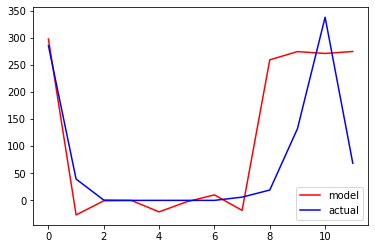

In [104]:
domain = [i % 12 for i in list(range(len(predicted)))]

year = 6

plt.plot(domain[year*12:(year+1)*12], predicted[year*12:(year+1)*12], c="r", label="model")
plt.plot(domain[year*12:(year+1)*12], ys[year*12:(year+1)*12], c="b", label="actual")
# plt.xlim(-2.5, 2.5)
plt.legend()
plt.show()